In [1]:
import os
import numpy as np
import sqlite3
import pandas as pd
from plotnine import *


path = "/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/backend/MoA_Batch2/sqlitefiles/"
platemap = "/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/metadata/target_ID_platemap_A549.csv"

pmeta = pd.read_csv(platemap)

files_path = []

for folder, sub, files in os.walk(path):
    for f in files:
        files_path.append(os.path.abspath(os.path.join(folder, f)))

        
final = []
for i, p in enumerate(files_path):
    
    
    dat = sqlite3.connect(p)
    query = dat.execute("SELECT * From Image")
    cols = [column[0] for column in query.description]
    results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

    df = results.loc[:, ['Count_Cells', 'Metadata_Well', 'Metadata_Plate']]

    data = df.groupby('Metadata_Well').agg({'Count_Cells':'sum', 'Metadata_Plate':'first'})
    
    final.append(data)

combined = pd.concat(final)
merged = pd.merge(combined, pmeta, left_on=["Metadata_Plate", "Metadata_Well"], right_on=["Metadata_Plate", "Metadata_Well"])


## Plotting Cell counts

In [4]:

wierd_dmso = "/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/metadata/Target_DMSO_weird.csv"
dmso_w = pd.read_csv(wierd_dmso)
test = dmso_w.drop_duplicates()
# dmso = merged.loc[merged['Metadata_broad_sample'] == 'DMSO']
# treatment = merged.loc[merged['Metadata_broad_sample'] != 'DMSO']
   

# Importing Supicious DMSO wells and making a new column 

In [45]:
df3 = pd.merge(merged,test,left_on=['Metadata_Plate', 'Metadata_Well'], right_on = ['Metadata_Plate', 'Metadata_Well'], how = 'left')

df3['Metadata_type'] = None
df3.loc[df3['Metadata_pert_type']=='trt', 'Metadata_type'] = 'Treatments'
df3.loc[(df3.Metadata_pert_type=="control") & (df3.Metadata_controls =="DMSO"), 'Metadata_type'] = 'Supicious_DMSO'
df3.loc[(df3.Metadata_pert_type=="control") & (df3.Metadata_controls !="DMSO"), 'Metadata_type'] = 'DMSO'
df3.to_csv('/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/R/Target_ID_suspiciousDMSO.csv')

In [89]:

# df3['Metadata_controls'].fillna(value=0, inplace=True)

# df3['Metadata_controls'] = df3['Metadata_controls'].apply({'DMSO':'Suspicious_DMSO', 0: 'DMSO'}.get)
# df3

In [ ]:
# visualize_model = function(target_variable, title, dpi = 500, save_figure = TRUE) {
#     plot_gg <- ggplot(cp_embedding_df, aes(x = umap_x, y = umap_y)) +
#         geom_point(aes_string(color = target_variable),
#                    size = 0.5,
#                    pch = 16,
#                    alpha = 0.6) +
#         theme_bw() +
#         scale_color_viridis_c(name = title) +
#         xlab("UMAP 1") +
#         ylab("UMAP 2")
#     if (save_figure) {
#         output_file <- file.path("figures",
#                                  paste0("umap_repurposing_cell_painting_",
#                                         target_variable,
#                                         "_consensus.png"))
#         ggsave(output_file, height = 5, width = 6, dpi = dpi)
#     }
#     print(plot_gg)

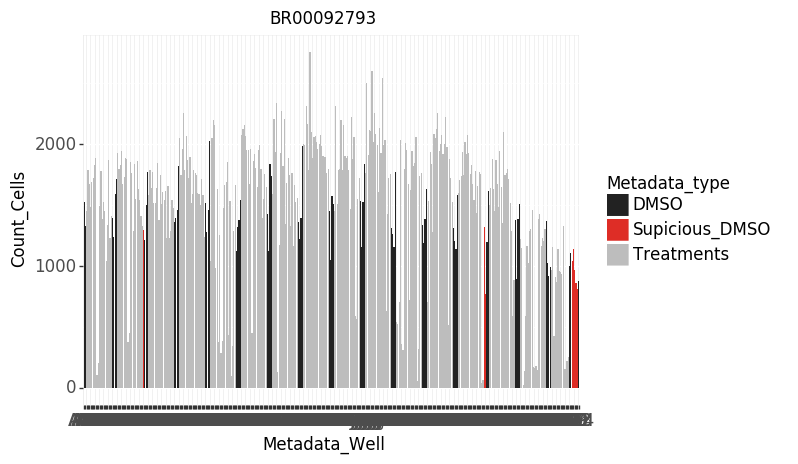

<ggplot: (-9223372036538593038)>


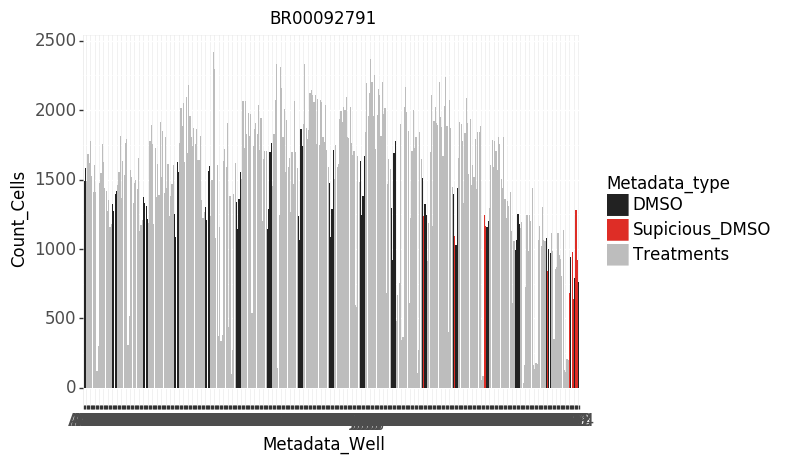

<ggplot: (-9223372036540968732)>


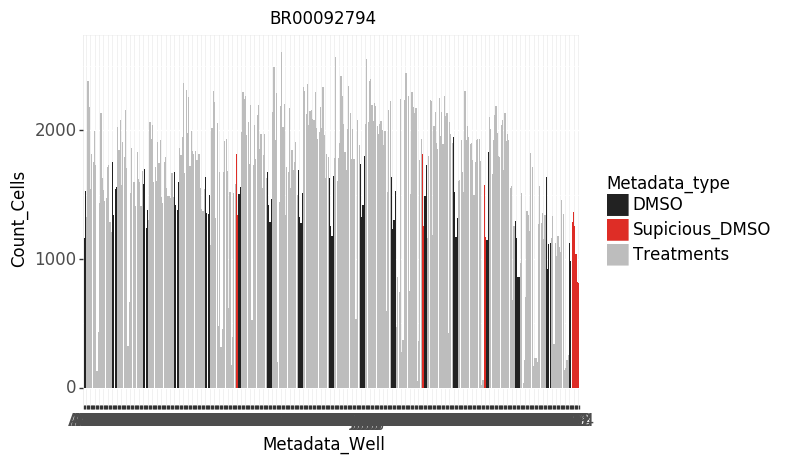

<ggplot: (-9223372036537714965)>


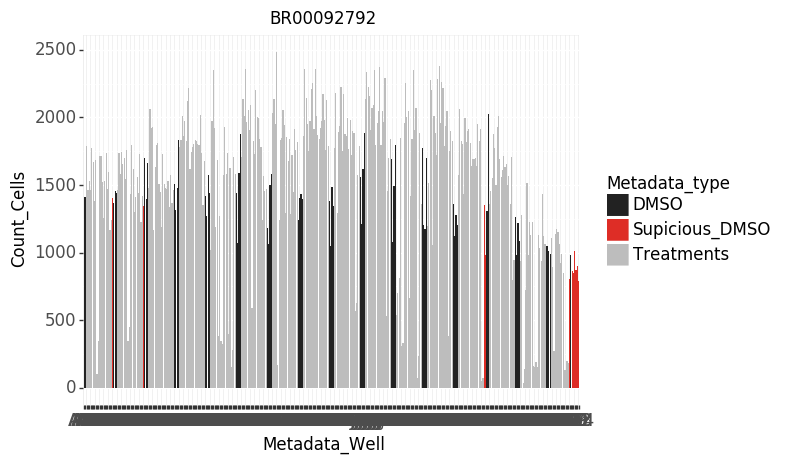

<ggplot: (314508573)>


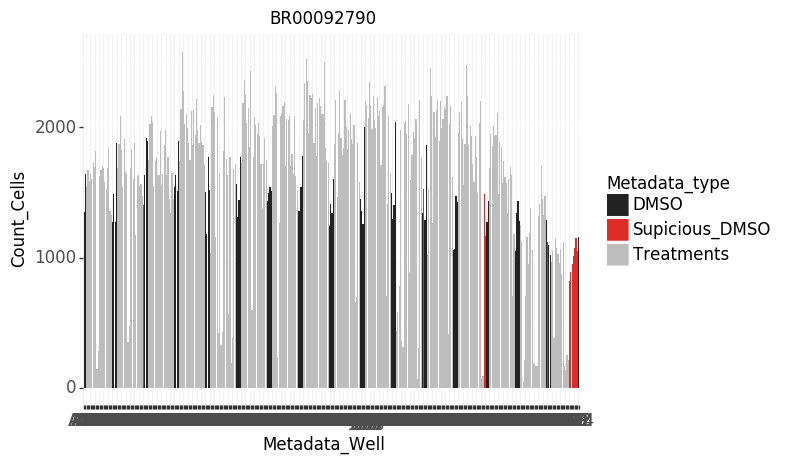

<ggplot: (313738781)>


In [71]:
import plotnine as gg
plates = df3['Metadata_Plate'].unique().tolist()


for i, p in enumerate(plates):
    df = df3.loc[df3['Metadata_Plate'] == p]
    g = gg.ggplot(df, aes(x='Metadata_Well', y='Count_Cells', fill='Metadata_type')) + \
    gg.geom_col() + \
    gg.theme(text=element_text(size=12)) + \
    gg.labs(title=p) + \
    gg.scale_fill_manual(values = ['#222222', '#de2d26','#bdbdbd'])
    print(g)
    
